In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, time
import glob

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing
import utils_exec_models
import utils_exec_models_new

import numpy as np
import pandas as pd
#to view entire text of the comuns
pd.set_option('display.max_colwidth', None) 

import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns


# Get all results CSV file

In [56]:
path = os.path.abspath('0_exec_results_py')


results_by_algorithm = []

for root, folders, files in os.walk(path, topdown=False):

    for name in files:
        if name.endswith('.csv'):

            aux = name.replace('.csv', '').replace('performance__','').split('__')
            algo = aux[0]
            feat = aux[1]
            scen = aux[2]
            es_algo = aux[3] if len(aux) == 4 else ''

            results_by_algorithm.append(
                [algo, feat, scen, es_algo, os.path.join(root, name)]
            )



# print(results_by_algorithm)


# Get the performance for each $scenario$ and $features$

In [57]:
df_all = None

for algorithm, features, scenario, es_algorithm, csv_file in results_by_algorithm:
#     utils.print_string_with_separators(f'{scenario} - {features}')
    df_temp = utils.read_csv(csv_file=csv_file)

    #sort performances
    df_temp = utils_exec_models_new.sort_performances_results(df=df_temp)    

#     # get first 3 results
    df_temp = df_temp.head(3)
#     display(df_temp)

    # acumulate the performances
    if df_all is None:
        df_all = df_temp
    else:
        df_all = pd.concat([df_all, df_temp])

    
df_all = utils_exec_models_new.sort_performances_results(df=df_all).reset_index(drop=True)    
display(df_all.head())

,Scenario,Features,Model,balanced_accuracy,sensitivity,specificity,f1_score,AUC,accuracy,precision,...,Estimator_Class,Estimator_Hyperparams,fit_time,train_balanced_accuracy,train_sensitivity,train_specificity,train_f1_score,train_AUC,train_accuracy,train_precision
0,Ensemble_Imbalance,All_Features,Balanced Bagging,0.84,0.85,0.84,0.56,0.91,0.84,0.41,...,KNeighborsClassifier,"{'algorithm':'auto','leaf_size':30,'metric':'manhattan','metric_params':None,'n_jobs':None,'n_neighbors':15,'p':2,'weights':'distance'}",0.09,0.78,0.70,0.85,0.52,0.87,0.83,0.41
1,Ensemble_Imbalance,All_Features,Balanced Bagging,0.84,0.85,0.84,0.56,0.91,0.84,0.41,...,KNeighborsClassifier,"{'algorithm':'auto','leaf_size':30,'metric':'manhattan','metric_params':None,'n_jobs':None,'n_neighbors':15,'p':2,'weights':'distance'}",0.09,0.78,0.70,0.85,0.52,0.87,0.83,0.41
2,Ensemble_Imbalance,All_Features,Balanced Bagging,0.84,0.85,0.83,0.54,0.90,0.83,0.40,...,GaussianNB,"{'priors':None,'var_smoothing':1e-09}",0.03,0.80,0.75,0.85,0.54,0.89,0.84,0.43
3,Ensemble_Imbalance,All_Features,Balanced Bagging,0.84,0.85,0.83,0.54,0.90,0.83,0.40,...,GaussianNB,"{'priors':None,'var_smoothing':1e-09}",0.03,0.80,0.75,0.85,0.54,0.89,0.84,0.43
4,Ensemble_Imbalance,All_Features,Balanced Bagging,0.84,0.85,0.83,0.54,0.90,0.83,0.40,...,GaussianNB,"{'priors':None,'var_smoothing':1e-09}",0.03,0.80,0.75,0.85,0.54,0.89,0.84,0.43


In [58]:
df_all.fillna('', inplace=True)

df_all['Algorithm'] = df_all.Estimator_Class + ' ' + df_all.Model_Class    
df_all.Algorithm = df_all.Algorithm.str.replace('BalancedBagging', '').str.replace('Classifier', '').str.strip()


df_all.sort_values(by=['Algorithm'], inplace=True)

df_all[['Algorithm', 'Estimator', 'Model', 'Model_Class', 'Estimator_Class']].head(9)

,Algorithm,Estimator,Model,Model_Class,Estimator_Class
24,ComplementNB,,Naïve Bayes,ComplementNB,
22,ComplementNB,,Naïve Bayes,ComplementNB,
21,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
20,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
19,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
6,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
7,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
8,ComplementNB,Naïve Bayes,Balanced Bagging,BalancedBaggingClassifier,ComplementNB
9,ComplementNB,,Naïve Bayes,ComplementNB,


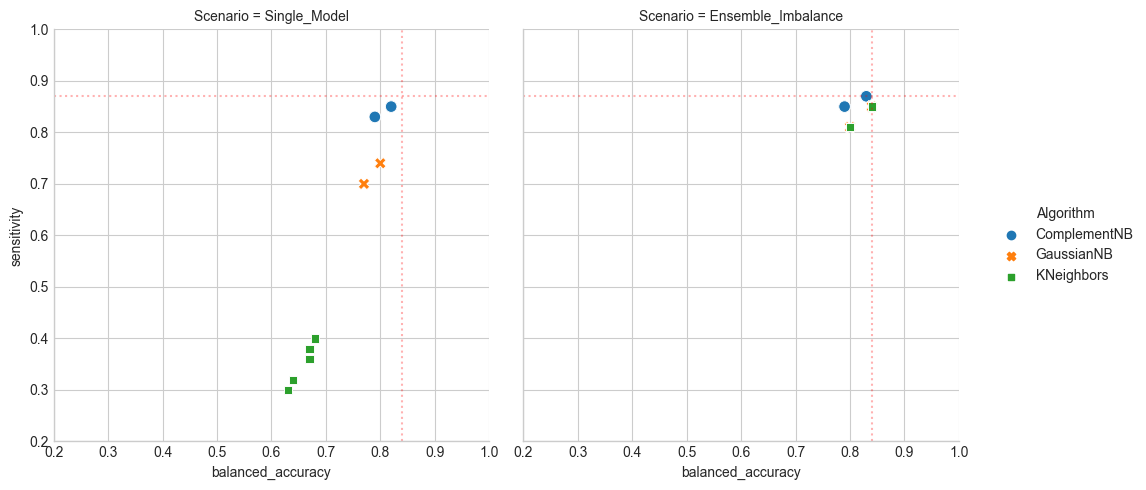

In [59]:
g = sns.relplot(
    data=df_all, 
    x="balanced_accuracy", 
    y="sensitivity",
    col="Scenario", 
    hue="Algorithm", 
    style="Algorithm",
    kind="scatter",
    s=70
)
plt.ylim(0.20, 1.0)
plt.xlim(0.20, 1.0)

g.refline(y=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3, label='')
g.refline(x=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)


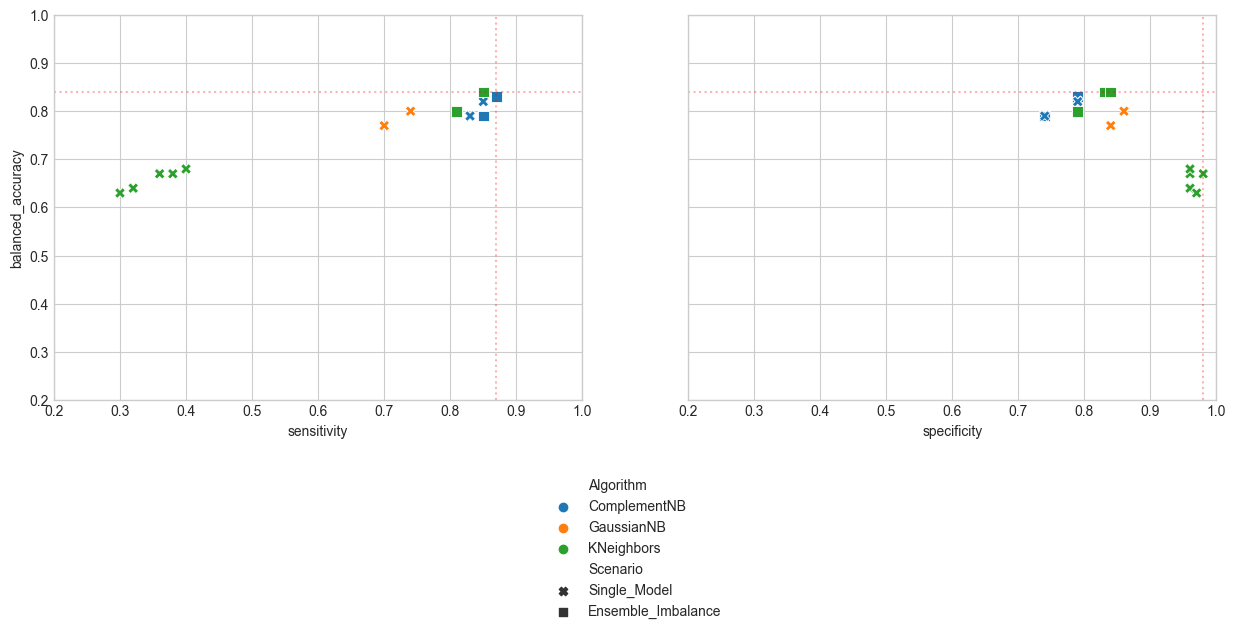

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharey=True)

g = sns.scatterplot(
    ax=axs[0],
    data=df_all, 
    x="sensitivity", 
    y="balanced_accuracy", 
    hue="Algorithm", 
    style="Scenario",
    markers={"Single_Model": "X", "Ensemble_Imbalance": "s"},
    s=60,
    legend=False,
)
axs[0].set_ylim(0.2, 1.0)
axs[0].set_xlim(0.2, 1.0)

axs[0].axvline(x=df_all.sensitivity.max(), linestyle=":", c='red', alpha=0.3)
axs[0].axhline(y=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)


sns.scatterplot(
    ax=axs[1],
    data=df_all, 
    x="specificity", 
    y="balanced_accuracy", 
    hue="Algorithm", 
    style="Scenario",
    markers={"Single_Model": "X", "Ensemble_Imbalance": "s"},
    s=60,
)
axs[1].set_ylim(0.2, 1.0)
axs[1].set_xlim(0.2, 1.0)

axs[1].axvline(x=df_all.specificity.max(), linestyle=":", c='red', alpha=0.3)
axs[1].axhline(y=df_all.balanced_accuracy.max(), linestyle=":", c='red', alpha=0.3)

plt.legend(loc='lower center', bbox_to_anchor=(-0.1, -0.6))


In [ ]:
np.arange(0.8, 1.01, .05)

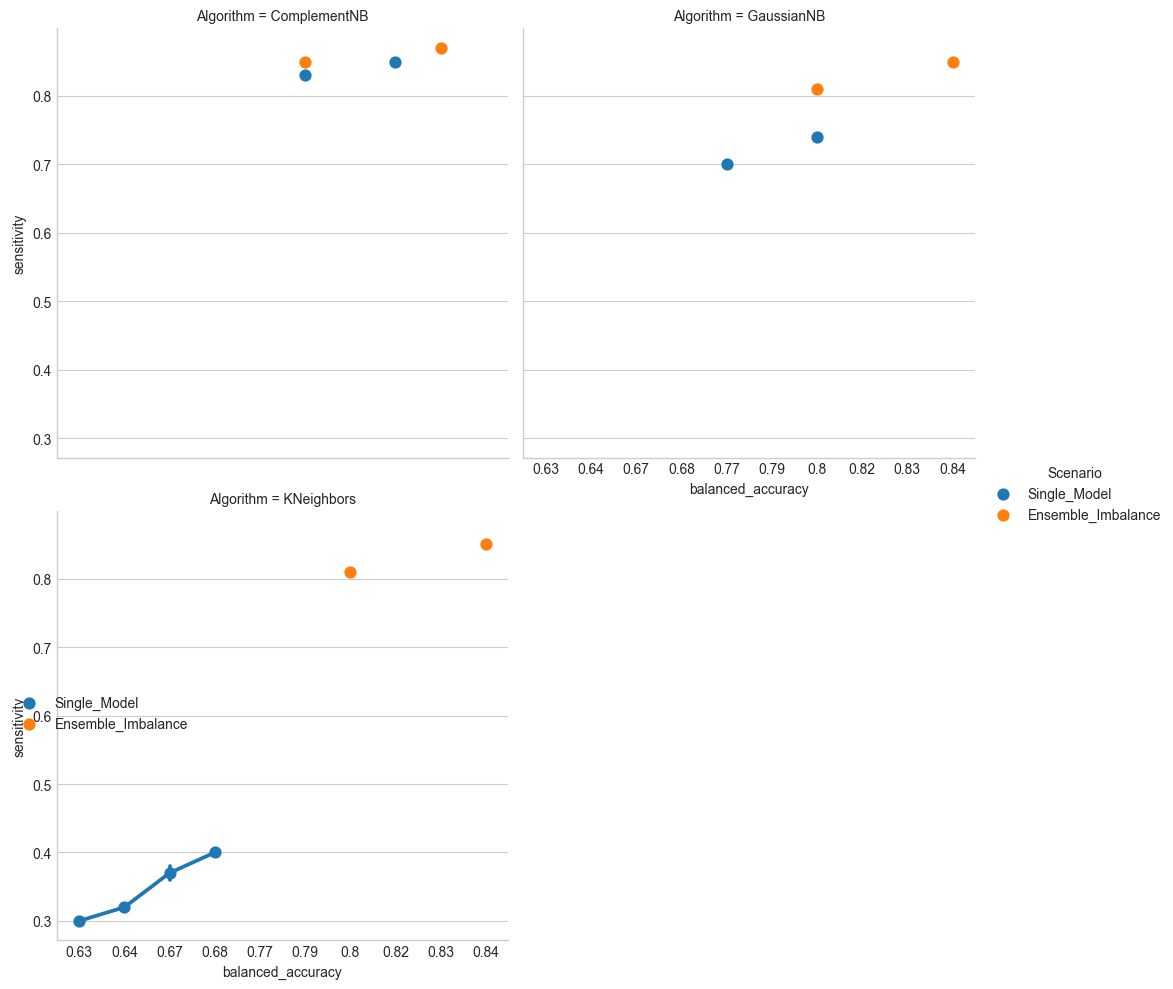

In [66]:
# fig, ax = plt.subplots()

g = sns.catplot(
    data=df_all, 
    x="balanced_accuracy", 
    y="sensitivity", 
    col="Algorithm", 
    hue="Scenario",
#     capsize=.2, 
#     palette="YlGnBu_d", 
#     errorbar="se",
    kind="point", 
#     height=6, 
#     aspect=.5,
    
#     sharex=True,
#     sharey=True,
    col_wrap=2,
)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 0.6))


# for i, ax in enumerate(g.axes.flat):  # set every-other axis for testing purposes
#     ax.set_xlim(0., 1.)
# #     pass

# g.despine(left=True)

# g.set(ylim=(0.8 ,1))
# g.set_xlim(.8, .9, 1.)

# g.set(xlim=(0.8 ,1))

# plt.ylim(.8, 1.)
# plt.xlim(.8, 1.)

# g.set(ylim=( 0., 1.), xlim=( 0., 1.))
# axes[0,1].set_ylim(0,)
# plt.show()